In [1]:
import pandas as pd
import datetime

# covid data taken from https://covidtracking.com/data/state/michigan/cases
covid_df=pd.read_excel('data\MI_COVID.xlsx')


covid_df['Date']=pd.to_datetime(covid_df.Date) + datetime.timedelta(days=-14)
covid_df.set_index('Date', inplace=True)

#covid_by_month=covid_df[['New cases', 'MONTH']].groupby('MONTH').sum()
#covid_by_month=covid_by_month[:5]

covid_df.head()


,Cases (confirmed plus probable),New cases,Confirmed cases,Probable Cases
Date,,,,
2020-10-24,229003,6494,207794,21209
2020-10-23,222509,4246,201569,20940
2020-10-22,218263,6103,197806,20457
2020-10-21,212160,4397,192096,20064
2020-10-20,207763,3437,187995,19768


In [2]:
#trips info taken from https://data.bts.gov/Research-and-Statistics/Trips-by-Distance/w96p-f2qv
trips_MI=pd.read_csv('data\Trips_MI.csv')
trips_MI['Date']=pd.to_datetime(trips_MI.Date)
trips_MI.set_index('Date', inplace=True)
trips_MI=trips_MI.iloc[:,2:]
trips_MI.tail()

,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
Date,,,,,,,,,,,,,
2020-10-20,5106072.0,14885758.0,56638341.0,12251902.0,13030302.0,6767188.0,8997863.0,9676930.0,3864188.0,1421994.0,514774.0,81348.0,31852.0
2020-10-21,5077576.0,14914254.0,56798578.0,12237520.0,13223455.0,6798972.0,8857183.0,9672250.0,3870659.0,1464259.0,552488.0,88932.0,32860.0
2020-10-22,4938560.0,15053270.0,57391180.0,12233117.0,13440986.0,6800473.0,9119085.0,9744509.0,3834780.0,1491186.0,598494.0,96906.0,31644.0
2020-10-23,4637878.0,15353952.0,63064830.0,13927590.0,14826434.0,7557186.0,9899424.0,10340775.0,4078176.0,1649957.0,654795.0,97908.0,32585.0
2020-10-24,5081616.0,14910214.0,62122668.0,14007682.0,15064778.0,7720921.0,9925141.0,9651742.0,3637134.0,1470775.0,541780.0,76339.0,26376.0


In [3]:
covid_graf=pd.merge(covid_df,trips_MI,how='inner', left_index=True, right_index=True)
covid_graf.head()

,Cases (confirmed plus probable),New cases,Confirmed cases,Probable Cases,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
Date,,,,,,,,,,,,,,,,,
2020-10-24,229003,6494,207794,21209,5081616.0,14910214.0,62122668.0,14007682.0,15064778.0,7720921.0,9925141.0,9651742.0,3637134.0,1470775.0,541780.0,76339.0,26376.0
2020-10-23,222509,4246,201569,20940,4637878.0,15353952.0,63064830.0,13927590.0,14826434.0,7557186.0,9899424.0,10340775.0,4078176.0,1649957.0,654795.0,97908.0,32585.0
2020-10-22,218263,6103,197806,20457,4938560.0,15053270.0,57391180.0,12233117.0,13440986.0,6800473.0,9119085.0,9744509.0,3834780.0,1491186.0,598494.0,96906.0,31644.0
2020-10-21,212160,4397,192096,20064,5077576.0,14914254.0,56798578.0,12237520.0,13223455.0,6798972.0,8857183.0,9672250.0,3870659.0,1464259.0,552488.0,88932.0,32860.0
2020-10-20,207763,3437,187995,19768,5106072.0,14885758.0,56638341.0,12251902.0,13030302.0,6767188.0,8997863.0,9676930.0,3864188.0,1421994.0,514774.0,81348.0,31852.0


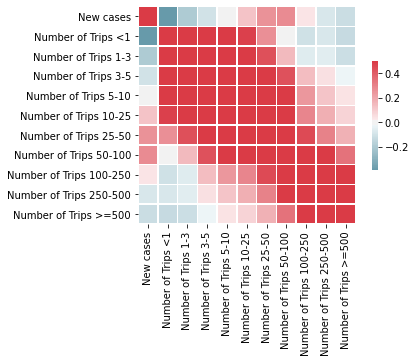

In [4]:
import seaborn as sns

cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig= sns.heatmap(covid_graf[['New cases','Number of Trips <1', 'Number of Trips 1-3','Number of Trips 3-5', 'Number of Trips 5-10', 
                        'Number of Trips 10-25','Number of Trips 25-50','Number of Trips 50-100','Number of Trips 100-250',
                        'Number of Trips 250-500', 'Number of Trips >=500']].corr(),vmax=0.5, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [5]:
covid_graf['Number of Trips <10 mi']=covid_graf['Number of Trips <1']+covid_graf['Number of Trips 1-3']+covid_graf['Number of Trips 3-5']+covid_graf['Number of Trips 5-10']
covid_graf['Number of Trips 10-100 mi']=covid_graf['Number of Trips 10-25']+covid_graf['Number of Trips 25-50']+covid_graf['Number of Trips 50-100']
covid_graf['Number of Trips >100 mi']=covid_graf['Number of Trips 100-250']+covid_graf['Number of Trips 250-500']+covid_graf['Number of Trips >=500']

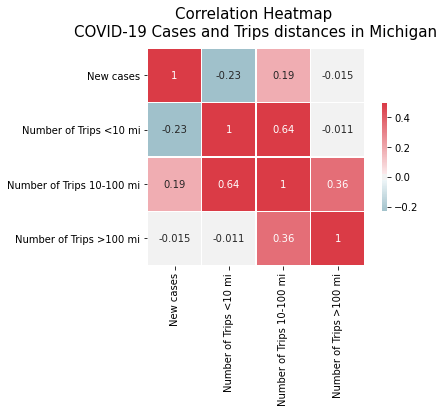

In [6]:

heatmap=sns.heatmap(covid_graf[['New cases','Number of Trips <10 mi','Number of Trips 10-100 mi','Number of Trips >100 mi']].corr(),vmax=0.5, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

heatmap.set_title('Correlation Heatmap \nCOVID-19 Cases and Trips distances in Michigan', fontdict={'fontsize':15}, pad=12);

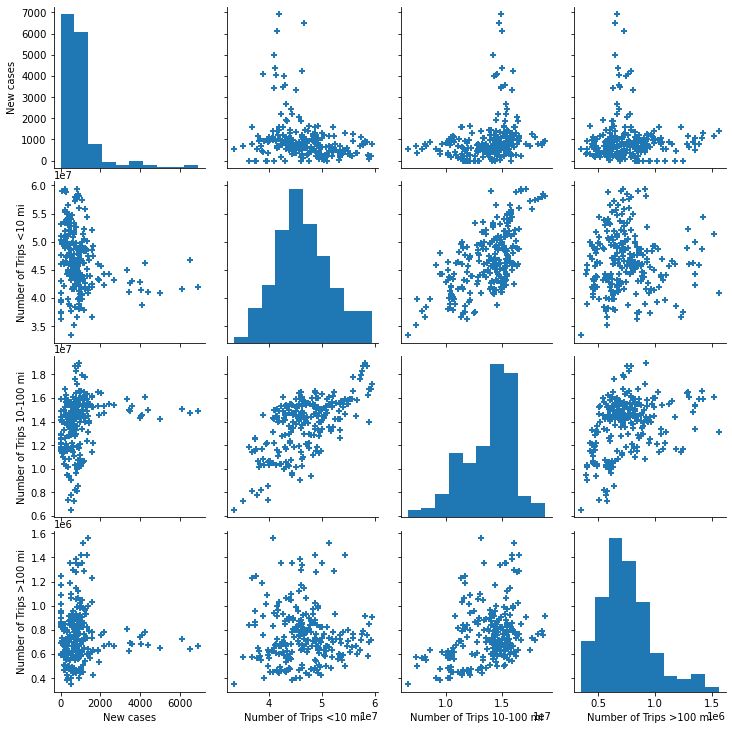

In [7]:
sns.pairplot(covid_graf[['New cases','Number of Trips <10 mi','Number of Trips 10-100 mi','Number of Trips >100 mi']], plot_kws=dict(marker="+", linewidth=2));#

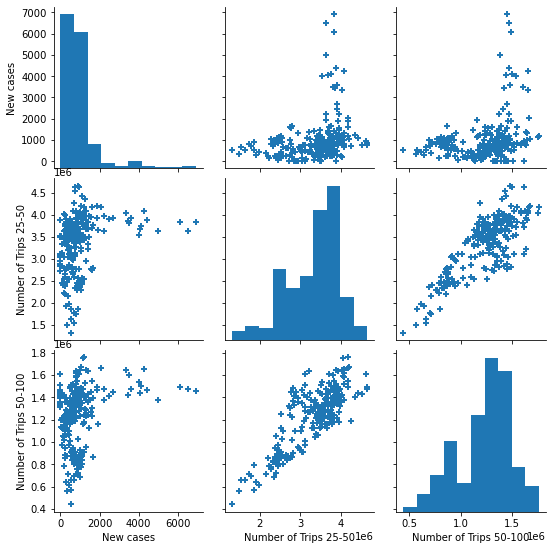

In [8]:
fig2= sns.pairplot(covid_graf[['New cases','Number of Trips 25-50','Number of Trips 50-100']], plot_kws=dict(marker="+", linewidth=2));#

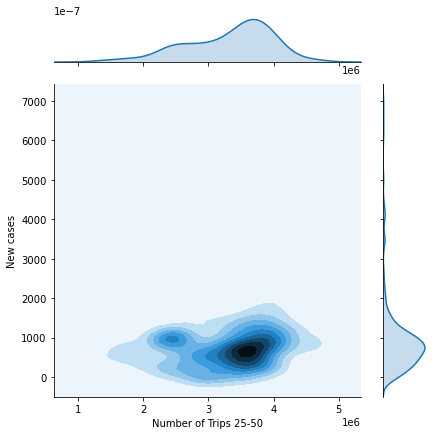

In [9]:
fig3=sns.jointplot(covid_graf['Number of Trips 25-50'], covid_graf['New cases'], kind='kde', space=0.5)